# Import Library

In [ ]:
%load_ext tensorboard

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

from nltk.corpus import stopwords
import tensorflow as tf
import datetime

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.7 MB/s eta 0:00:00


In [ ]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification, TFAutoModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file and load its content into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/cleaned.csv')

# Show the first few rows of the DataFrame
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN


# Data Cleaning

## Check and fill the missing data

In [ ]:
# Read the CSV file and load its content into a DataFrame
place = pd.read_csv('/content/drive/MyDrive/Capstone | Bangkit 2023/Review/Places.csv')

# Show the first few rows of the DataFrame
place.head()

,Place_ID,Name,FormattedPhone,FormattedAddress,Latitude,Longitude,OverallRating,PriceLevel,Website,UserRatingTotal,...,ServesWine,ServesVegetarianFood,WheelchairAccessibleEntrance,Halal,StreetAddress,District,City,Regency,Province,PostalNumber
0,ChIJ8b3du_dZei4R5Csj9BqdzsM,LOKO CAFE STASIUN TUGU,0812-2009-6492,"Sosromenduran, Gedong Tengen, Kota Yogyakarta,...",-7.789311,110.363483,4.1,NaN,https://instagram.com/lokocafe?igshid=OTJlNzQ0...,12.0,...,NaN,NaN,NaN,0,NaN,NaN,Kota Yogyakarta,NaN,Daerah Istimewa,Yogyakarta
1,ChIJ-1OO3xhZei4RpiUw_jIlPBQ,TUGU LOR,(0274) 515268,"Cokrodiningratan, Kec. Jetis, Kota Yogyakarta,...",-7.774089,110.368301,4.5,2.0,NaN,1644.0,...,0.0,NaN,0.0,1,NaN,Kec. Jetis,Kota Yogyakarta,NaN,Daerah Istimewa Yogyakarta,55233
2,ChIJAbDRQ7pZei4Rm8oXtJg74k8,Ramu Nostalgia - Tugu Yogyakarta,0851-5692-3734,"Jl. A.M. Sangaji No.2, Cokrodiningratan, Kec. ...",-7.782492,110.367303,5.0,NaN,http://www.ramunostalgia.com/,17.0,...,0.0,NaN,NaN,1,Jl. A.M. Sangaji No.2,Kec. Jetis,Kota Yogyakarta,NaN,Daerah Istimewa Yogyakarta,55233
3,ChIJWW-U4vlZei4RHX6ILzVTvcA,Kedai Kolega Tugu,0821-3750-7055,"Jl. P. Mangkubumi No.21, Gowongan, Kec. Jetis,...",-7.787412,110.366382,4.6,NaN,NaN,59.0,...,0.0,NaN,NaN,1,Jl. P. Mangkubumi No.21,Kec. Jetis,Kota Yogyakarta,NaN,Daerah Istimewa Yogyakarta,55232
4,ChIJq6pHmTBYei4RlTjahkZgUlY,Wedangan,NaN,"Jl. A.M. Sangaji No.9, Cokrodiningratan, Kec. ...",-7.782092,110.367058,5.0,NaN,NaN,10.0,...,0.0,NaN,NaN,1,Jl. A.M. Sangaji No.9,Kec. Jetis,Kota Yogyakarta,NaN,Daerah Istimewa Yogyakarta,55233


In [ ]:
# Filter the DataFrame 'place' to select rows where the 'Name' column contains the substring "Kopi PM"
place[place['Name'].str.contains("Kopi PM")]

,Place_ID,Name,FormattedPhone,FormattedAddress,Latitude,Longitude,OverallRating,PriceLevel,Website,UserRatingTotal,...,ServesWine,ServesVegetarianFood,WheelchairAccessibleEntrance,Halal,StreetAddress,District,City,Regency,Province,PostalNumber
23,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꧋ꦏꦺꦴꦥꦶ꧇ꦥ꧈ꦩ꧈꧇꧉,0878-3965-2668,"Alun alun utara, Kecamatan Kraton, Kota Yogyak...",-7.804102,110.365875,5.0,NaN,NaN,14.0,...,NaN,NaN,NaN,0,NaN,Kecamatan Kraton,Kota Yogyakarta,NaN,Daerah Istimewa Yogyakarta,55131


In [ ]:
# Calculate the number of missing values in each column of the DataFrame 'df'
df.isna().sum()

Place_ID        25
Place_Name       0
User             0
Review           0
Star             0
Sentiment     5566
dtype: int64

In [ ]:
# Filter the DataFrame 'df' to select rows where the 'Place_ID' column contains missing values (NaN)
df[df.Place_ID.isna()]

,Place_ID,Place_Name,User,Review,Star,Sentiment
2237,NaN,Kopi PM ꦏꦥꦥꦩ,Abdul Aziz,Teman2 muslim harap hati2 karena ada minuman b...,4,NaN
2238,NaN,Kopi PM ꦏꦥꦥꦩ,Agung Aryanto,Coffeeshop yang cukup cakep di daerah selatan ...,5,NaN
2239,NaN,Kopi PM ꦏꦥꦥꦩ,deandra fariska,Pertama kali kesini langsung jatuh cinta sama ...,5,NaN
2240,NaN,Kopi PM ꦏꦥꦥꦩ,Sukarno,Salah satu tempat nongski asyik di selatan Jog...,5,NaN
2241,NaN,Kopi PM ꦏꦥꦥꦩ,Reza Horisman,Lokasinya persis dibelokan pinggir jalan by pa...,5,NaN
2242,NaN,Kopi PM ꦏꦥꦥꦩ,Dhimas B,Lokasi cafe ini ada diringroad selatan. Pas be...,5,NaN
2243,NaN,Kopi PM ꦏꦥꦥꦩ,Nadiah Mumtaz,"Cafe dengan tema serba putih, earthy, artsy, b...",5,NaN
2244,NaN,Kopi PM ꦏꦥꦥꦩ,Beenta,Tempatnya asyik buat nongkrong. Teh Leci nya k...,4,NaN
2245,NaN,Kopi PM ꦏꦥꦥꦩ,bambang irawan,"Lokasi beneran pas pojok, jd kudu dijalur lamb...",3,NaN
2246,NaN,Kopi PM ꦏꦥꦥꦩ,Ludovica Elisa,Awalnya gatau kl ada kopisyopp seenak dan seny...,5,NaN


In [ ]:
# Replace missing values in the 'Place_ID' column with the value 'ChIJu3TwQcRZei4RNxcUTwE6AJI'
df['Place_ID'] = df.Place_ID.fillna('ChIJu3TwQcRZei4RNxcUTwE6AJI')

In [ ]:
# Filter the DataFrame 'df' to select rows where the 'Place_ID' column contains missing values (NaN)
df[df.Place_ID.isna()]

,Place_ID,Place_Name,User,Review,Star,Sentiment


In [ ]:
# Filter the DataFrame 'place' to select rows where the 'Name' column contains the substring "Kopi PM" to check the filled column
place[place['Name'].str.contains("Kopi PM")]

,Place_ID,Place_Name,User,Review,Star,Sentiment
2237,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Abdul Aziz,Teman2 muslim harap hati2 karena ada minuman b...,4,NaN
2238,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Agung Aryanto,Coffeeshop yang cukup cakep di daerah selatan ...,5,NaN
2239,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,deandra fariska,Pertama kali kesini langsung jatuh cinta sama ...,5,NaN
2240,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Sukarno,Salah satu tempat nongski asyik di selatan Jog...,5,NaN
2241,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Reza Horisman,Lokasinya persis dibelokan pinggir jalan by pa...,5,NaN
2242,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Dhimas B,Lokasi cafe ini ada diringroad selatan. Pas be...,5,NaN
2243,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Nadiah Mumtaz,"Cafe dengan tema serba putih, earthy, artsy, b...",5,NaN
2244,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Beenta,Tempatnya asyik buat nongkrong. Teh Leci nya k...,4,NaN
2245,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,bambang irawan,"Lokasi beneran pas pojok, jd kudu dijalur lamb...",3,NaN
2246,ChIJu3TwQcRZei4RNxcUTwE6AJI,Kopi PM ꦏꦥꦥꦩ,Ludovica Elisa,Awalnya gatau kl ada kopisyopp seenak dan seny...,5,NaN


In [ ]:
# Calculate the number of missing values in each column of the DataFrame 'df' again
df.isna().sum()

Place_ID         0
Place_Name       0
User             0
Review           0
Star             0
Sentiment     5566
dtype: int64

## Cleaning Review Text

In [ ]:
# remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

# lowercase string
def lowercase_string(text):
    return text.lower()

# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

# Remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Remove multiple whitespace into single whitespace -- leading & trailing whitespace
def remove_whitespace_multiple(text):
    return ' '.join(text.split())

#Correcting the repeating characters in the end of the word
def correct_repeating_characters(text):
    # Remove repeating characters at the end of words
    corrected_text = re.sub(r'(\w)(\1{2,})\b', r'\1', text)

    # Remove repeating spaces
    corrected_text = re.sub(r'\s+', ' ', corrected_text)

    return corrected_text

# remove special characters
def remove_special_characters(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text

# remove emoticon
def remove_emoticons(text):
    emoticon_pattern = re.compile(
        u"[\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002600-\U000026FF"  # miscellaneous symbols
        u"\U00002700-\U000027BF"  # dingbats
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        "]+"
    )
    cleaned_text = re.sub(emoticon_pattern, '', text)
    return cleaned_text

In [ ]:
# Convert the 'Review' column to a new variable 'reviews' with values represented as strings
reviews = df.Review.astype(str)

In [ ]:
reviews

0       Akhirnyaaaa bisa nulis review yang memuaskannn...
1       Cafe de paris\nTerletak di timur pantai parang...
2       masakannya enak tp kecil2 sesuai dg harganya😊,...
3       Ownernya baik banget, nginep disini pas Ramadh...
4       Tempatnya bagus bgt, makanan enak dan cocok bu...
                              ...                        
5561    Ya ternyata dibalik belum sempurna ada hikmah....
5562    Salah satu dari dua plengkung yang masih utuh ...
5563    Katanya ada grosir kembang api nama tokonya ap...
5564                  vibe sejarahnya dpt banget , klasik
5565    Jalan masuk ke pusat kuliner gudeg jogja, ting...
Name: Review, Length: 5566, dtype: object

In [ ]:
# Apply a series of cleaning operations to the 'reviews'
cleaned_reviews = reviews.apply(lowercase_string)\
                  .apply(remove_number) \
                  .apply(remove_emoticons) \
                  .apply(remove_punctuation) \
                  .apply(remove_single_char) \
                  .apply(remove_whitespace_multiple) \
                  .apply(correct_repeating_characters) \
                  .apply(remove_special_characters)

In [ ]:
cleaned_reviews

0       akhirnya bisa nulis review yang memuaskan lagi...
1       cafe de paris terletak di timur pantai parangt...
2       masakannya enak tp kecil sesuai dg harganya pi...
3       ownernya baik banget nginep disini pas ramadha...
4       tempatnya bagus bgt makanan enak dan cocok bua...
                              ...                        
5561    ya ternyata dibalik belum sempurna ada hikmah ...
5562    salah satu dari dua plengkung yang masih utuh ...
5563    katanya ada grosir kembang api nama tokonya ap...
5564                    vibe sejarahnya dpt banget klasik
5565    jalan masuk ke pusat kuliner gudeg jogja tingg...
Name: Review, Length: 5566, dtype: object

## Normalization (Correct the slang word)

In [ ]:
# Read the CSV file and load its content into a DataFrame
slang_df = pd.read_csv('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/new_kamusalay.csv', header = None, encoding='latin-1')

# Show the first few rows of the DataFrame
slang_df.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
# Create a dictionary 'slang_dict' by zipping together two columns from the DataFrame 'slang_df'
slang_dict = dict(zip(slang_df[0], slang_df[1]))

In [ ]:
def correct_slang_words(text, slang_dict):
  # Split the text into individual words
  words = text.split()
  corrected_words = []

  # Iterate over each word in the text
  for word in words:
    # Check if the word exists in the slang dictionary
    if word in slang_dict:
      # If the word is found in the dictionary, replace it with the corrected word
      corrected_word = slang_dict[word]
      corrected_words.append(corrected_word)
    else:
      # If the word is not found in the dictionary, keep it unchanged
      corrected_words.append(word)

  # Join the corrected words back into a single string
  corrected_text = ' '.join(corrected_words)
  return corrected_text

In [ ]:
# Apply the 'correct_slang_words' function to each element in the 'cleaned_reviews' series
cleaned_reviews = cleaned_reviews.apply(lambda x: correct_slang_words(x, slang_dict))

In [ ]:
cleaned_reviews

0       akhirnya bisa menulis review yang memuaskan la...
1       cafe deh paris terletak di timur pantai parang...
2       masakannya enak tetapi kecil sesuai dengan har...
3       ownernya baik banget menginap di sini pas rama...
4       tempatnya bagus banget makanan enak dan cocok ...
                              ...                        
5561    ya ternyata dibalik belum sempurna ada hikmah ...
5562    salah satu dari dua plengkung yang masih utuh ...
5563    katanya ada grosir kembang api nama tokonya ap...
5564                  vibe sejarahnya dapat banget klasik
5565    jalan masuk ke pusat kuliner gudeg yoyakarta t...
Name: Review, Length: 5566, dtype: object

## Remove Stopwords

In [ ]:
# Read the CSV file 'stopwordbahasa.csv' and load its content into a DataFrame
stopwords = pd.read_csv('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/stopwordbahasa.csv', header=None)

# Display the first few rows of the DataFrame 'stopwords'
stopwords.head()

,0
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [ ]:
# Filter the DataFrame 'stopwords' to select rows with specific indices
stopwords[stopwords.index.isin([46, 50, 66, 232, 351, 357, 371, 725, 726, 727, 728])]

,0
46,baik
50,banyak
66,belum
232,dua
351,lama
357,lima
371,masalah
725,tidak
726,tidakkah
727,tidaklah


In [ ]:
# Filter the DataFrame 'stopwords' to select rows with specific indices and assign the result to 'stopwords_fix'
stopwords_fix = stopwords[stopwords.index.isin([46, 50, 66, 351, 371, 725, 726, 727])]

# Rename the column of the 'stopwords_fix' DataFrame to 'stopword'
stopwords_fix.columns = ['stopword']

In [ ]:
#  Assigns a new list of stopwords to 'new_stopwords'
new_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                  'kalo', 'amp', 'biar', 'bikin', 'bilang',
                  'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                  'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                  'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                  'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                  '&amp', 'yah', 'nya', 'untuk', 'e']

# Convert the list to a DataFrame
new_stopwords_df = pd.DataFrame(new_stopwords, columns=['stopword'])

# Concatenate the new DataFrame with the original DataFrame
stopwords = pd.concat([stopwords_fix, new_stopwords_df], ignore_index=True)

In [ ]:
# Display the first few rows of the DataFrame 'stopwords'
stopwords.head()

,stopword
0,baik
1,banyak
2,belum
3,lama
4,masalah


In [ ]:
# Display the last few rows of the DataFrame 'stopwords'
stopwords.tail()

,stopword
45,&amp
46,yah
47,nya
48,untuk
49,e


In [ ]:
def remove_stopwords(text, stopwords):
  # Split the text into individual words
  words = text.split()

  # Filter out the words that are present in the stopwords list
  filtered_words = [word for word in words if word not in stopwords]

  # Join the filtered words back into a single string
  filtered_text = ' '.join(filtered_words)

  return filtered_text

In [ ]:
# Apply the 'remove_stopwords' function to each element in the 'cleaned_reviews' series
cleaned_reviews = cleaned_reviews.apply(lambda x: remove_stopwords(x, stopwords['stopword']))

In [ ]:
cleaned_reviews

0       akhirnya bisa menulis review yang memuaskan la...
1       cafe deh paris terletak di timur pantai parang...
2       masakannya enak tetapi kecil sesuai dengan har...
3       ownernya baik banget menginap di sini pas rama...
4       tempatnya bagus banget makanan enak dan cocok ...
                              ...                        
5561    ya ternyata dibalik belum sempurna ada hikmah ...
5562    salah satu dari dua plengkung yang masih utuh ...
5563    katanya ada grosir kembang api nama tokonya ap...
5564                  vibe sejarahnya dapat banget klasik
5565    jalan masuk ke pusat kuliner gudeg yoyakarta t...
Name: Review, Length: 5566, dtype: object

In [ ]:
cleaned_reviews.to_list()

['akhirnya bisa menulis review yang memuaskan lagi enak banget ikan bakarnyaa makanan semua oke sentuhan bumbunya lain dari pada yang lain ibu bapak lupa belum kenalan super ramah couple goals bisa haha hihi sampai menua bersama sehat selalu bapak ibu janji deh akan balik lagi suka banget sama tempat dan masakan ibunya bule saja makan di sini wisatawan lokal jangan mau kalah dongggjelajahi terus wisata indonesia terima kasih bonus tunanya busempat galau antara kakap atau tuna akhirnya malah bisa merasakan keduanyaa',
 'cafe deh paris terletak di timur pantai parangtritis dan akses dengan jalan kaki dari parkiran terakhir makanannya cukup banyak pilihan mulai dari seafood sayur dan minuman suasannya nyaman dan santai dengan banyak pilihan tempat duduk ayunan tempat tidur gantung serta gazebo konsep nya cafe pantai yang asyik harga nya murah untuk di tempat wisata worth it',
 'masakannya enak tetapi kecil sesuai dengan harganya pisang gorengnya mantap sambelnya mantap',
 'ownernya baik b

## Remove -nya

In [ ]:
def remove_nya(text):
    cleaned_text = re.sub(r'(\w+)nya\b', r'\1', text)
    return cleaned_text

In [ ]:
# Apply the 'remove_nya' function to each element in the 'cleaned_reviews' series
cleaned_reviews = cleaned_reviews.apply(remove_nya)

In [ ]:
cleaned_reviews.to_list()

['akhir bisa menulis review yang memuaskan lagi enak banget ikan bakarnyaa makanan semua oke sentuhan bumbu lain dari pada yang lain ibu bapak lupa belum kenalan super ramah couple goals bisa haha hihi sampai menua bersama sehat selalu bapak ibu janji deh akan balik lagi suka banget sama tempat dan masakan ibu bule saja makan di sini wisatawan lokal jangan mau kalah dongggjelajahi terus wisata indonesia terima kasih bonus tuna busempat galau antara kakap atau tuna akhir malah bisa merasakan keduanyaa',
 'cafe deh paris terletak di timur pantai parangtritis dan akses dengan jalan kaki dari parkiran terakhir makanan cukup banyak pilihan mulai dari seafood sayur dan minuman suasan nyaman dan santai dengan banyak pilihan tempat duduk ayunan tempat tidur gantung serta gazebo konsep nya cafe pantai yang asyik harga nya murah untuk di tempat wisata worth it',
 'masakan enak tetapi kecil sesuai dengan harga pisang goreng mantap sambel mantap',
 'owner baik banget menginap di sini pas ramadan p

### data training and testing cleaning and pre-processing

In [ ]:
# Define the column names for the DataFrame
columns = ['text', 'label']

# Read the TSV file 'train_data_restaurant.tsv' and load its content into a DataFrame
train = pd.read_table('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/traintest_data/train_data_restaurant.tsv', header=None, names=columns)

# Display the first few rows of the DataFrame 'train'
train.head()

,text,label
0,Saya makan di sini dengan menggunakan voucher ...,negative
1,Mas indosat buat main game enemy has been slai...,negative
2,Trus sy percuma dong update no hp terbaru ke c...,negative
3,jika kita pilih dia maka akan ada lebih dari 3...,negative
4,Dikarenakan adik saya suka dengan restoran ini...,negative


In [ ]:
# Define the column names for the DataFrame
columns = ['text', 'label']

# Read the TSV file 'test_data_restaurant.tsv' and load its content into a DataFrame
test = pd.read_table('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/traintest_data/test_data_restaurant.tsv', header=None, names=columns)

# Display the first few rows of the DataFrame 'test'
test.head()

,text,label
0,"Tempatnya sih menarik, mudah dijangkau dari se...",negative
1,lokasi strategis penasaran karena daerah situ ...,negative
2,"Sesuai namanya, restoran ini unik dalam menyaj...",negative
3,Saya datang ketika petang dan hujan deras temp...,negative
4,"Kalao mau ke sana jangan pas malem sih, soalny...",negative


In [ ]:
# Define the mapping dictionary
mapping_dict = {'negative': 0, 'positive': 1}

# Map the values using the dictionary
train['label'] = train['label'].map(mapping_dict)
test['label'] = test['label'].map(mapping_dict)

In [ ]:
train.head()

,text,label
0,Saya makan di sini dengan menggunakan voucher ...,0
1,Mas indosat buat main game enemy has been slai...,0
2,Trus sy percuma dong update no hp terbaru ke c...,0
3,jika kita pilih dia maka akan ada lebih dari 3...,0
4,Dikarenakan adik saya suka dengan restoran ini...,0


In [ ]:
def clean_data(reviews):
  # Apply various cleaning functions to the 'reviews' data
  reviews = reviews.apply(lowercase_string)\
                  .apply(remove_number) \
                  .apply(remove_emoticons) \
                  .apply(remove_punctuation) \
                  .apply(remove_single_char) \
                  .apply(remove_whitespace_multiple) \
                  .apply(correct_repeating_characters) \
                  .apply(remove_special_characters)


  # Correct the slang words
  reviews = reviews.apply(lambda x: correct_slang_words(x, slang_dict))

  # Remove stopwords
  reviews = reviews.apply(lambda x: remove_stopwords(x, stopwords['stopword']))

  # Remove -nya
  reviews = reviews.apply(remove_nya)

  return reviews

In [ ]:
# Apply the 'clean_data' function to the 'text' column of the 'train' DataFrame
train['text_cleaned'] = clean_data(train['text'])

In [ ]:
train.head()

,text,label,text_cleaned
0,Saya makan di sini dengan menggunakan voucher ...,0,saya makan di sini dengan menggunakan kupon di...
1,Mas indosat buat main game enemy has been slai...,0,mas indosat buat main game enemy has been sela...
2,Trus sy percuma dong update no hp terbaru ke c...,0,terus saya percuma dong pembaruan no handphone...
3,jika kita pilih dia maka akan ada lebih dari 3...,0,jika kita pilih dia maka akan ada lebih dari k...
4,Dikarenakan adik saya suka dengan restoran ini...,0,dikarenakan adik saya suka dengan restoran ini...


In [ ]:
# Apply the 'clean_data' function to the 'text' column of the 'test' DataFrame
test['text_cleaned'] = clean_data(test['text'])

In [ ]:
test.head()

,text,label,text_cleaned
0,"Tempatnya sih menarik, mudah dijangkau dari se...",0,tempat sih menarik mudah dijangkau dari segala...
1,lokasi strategis penasaran karena daerah situ ...,0,lokasi strategis penasaran karena daerah situ ...
2,"Sesuai namanya, restoran ini unik dalam menyaj...",0,sesuai nama restoran ini unik dalam menyajikan...
3,Saya datang ketika petang dan hujan deras temp...,0,saya datang ketika petang dan hujan deras temp...
4,"Kalao mau ke sana jangan pas malem sih, soalny...",0,kalau mau ke sana jangan pas malam sih soal ba...


### Model Building

In [ ]:
model1 = 'w11wo/indonesian-roberta-base-sentiment-classifier'

In [ ]:
# Configuration
MAX_LEN = 50
LOWER_CASE = True
RANDOM_STATE = 1654
TEST_SIZE = 0.2
NUM_LABELS = 1
LEARNING_RATE = 1e-5
EPOCHS = 4

In [ ]:
# Tokenize the data
tokenizer = RobertaTokenizer.from_pretrained(model1)
x_train = tokenizer(
    text = train["text_cleaned"].tolist(),
    add_special_tokens=True,
    max_length=MAX_LEN,
    truncation=True,
    padding=True,
    return_tensors="tf",
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_test = tokenizer(
    text = test["text_cleaned"].tolist(),
    add_special_tokens=True,
    max_length=MAX_LEN,
    truncation=True,
    padding=True,
    return_tensors="tf",
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
# load a pre-trained RoBERTa base model
roberta_base = TFAutoModel.from_pretrained(model1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['classifier.dense.bias', 'roberta.embeddings.position_ids', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.Input(shape=(MAX_LEN), dtype=tf.int32, name="input_ids")
input_mask = tf.keras.Input(shape=(MAX_LEN), dtype=tf.int32, name="attention_mask")

# Get the RoBERTa embeddings
embeddings = roberta_base(input_ids, attention_mask=input_mask)[1]

# Apply dropout regularization
x = tf.keras.layers.Dropout(0.3)(embeddings)

# Add a dense layer with ReLU activation
x = tf.keras.layers.Dense(128, activation="relu")(x)

# Apply dropout regularization
x = tf.keras.layers.Dropout(0.2)(x)

# Add another dense layer with ReLU activation
x = tf.keras.layers.Dense(64, activation="relu")(x)

# Output layer with sigmoid activation for classification
output = tf.keras.layers.Dense(NUM_LABELS, activation="sigmoid")(x)

# Create the model
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=output)

In [ ]:
# Set the roberta model as trainable
model.layers[2].trainable = True

# Print the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 50)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 50,                                          

In [ ]:
# Set the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=["accuracy"])

In [ ]:
# Set tensorboard as the callback
# path = '/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/logs/fit/'
# log_dir = path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
history = model.fit(
    x={"input_ids": x_train["input_ids"],
       "attention_mask": x_train["attention_mask"]},
    y=train["label"],
    validation_data=(
        {"input_ids": x_test["input_ids"],
         "attention_mask": x_test["attention_mask"]},
        test['label']
    ),
    epochs=EPOCHS,
    batch_size=30
)

Epoch 1/5
60/60 [==============================] - 1284s 21s/step - loss: 0.1312 - accuracy: 0.9697 - val_loss: 0.4460 - val_accuracy: 0.8757
Epoch 2/5
60/60 [==============================] - 1240s 21s/step - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.3224 - val_accuracy: 0.9135
Epoch 3/5
60/60 [==============================] - 1233s 21s/step - loss: 0.0185 - accuracy: 0.9966 - val_loss: 0.3346 - val_accuracy: 0.9135
Epoch 4/5
60/60 [==============================] - 1231s 21s/step - loss: 0.0112 - accuracy: 0.9983 - val_loss: 0.3012 - val_accuracy: 0.9405
Epoch 5/5
60/60 [==============================] - 1235s 21s/step - loss: 0.0133 - accuracy: 0.9978 - val_loss: 0.3806 - val_accuracy: 0.9135


## Evaluate the model

In [ ]:
# %tensorboard --logdir /content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/logs/fit/

In [83]:
range(1, len(history.history['loss']))

range(1, 5)

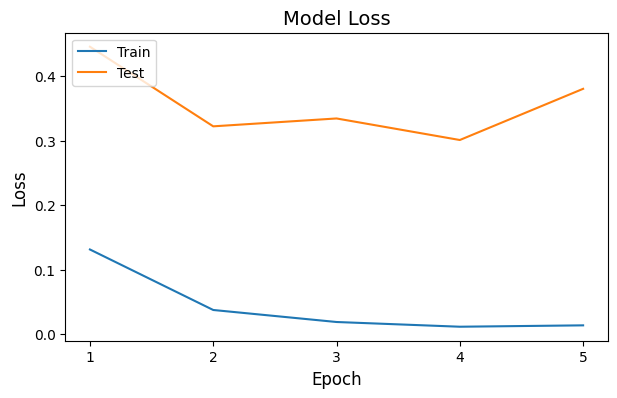

In [85]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

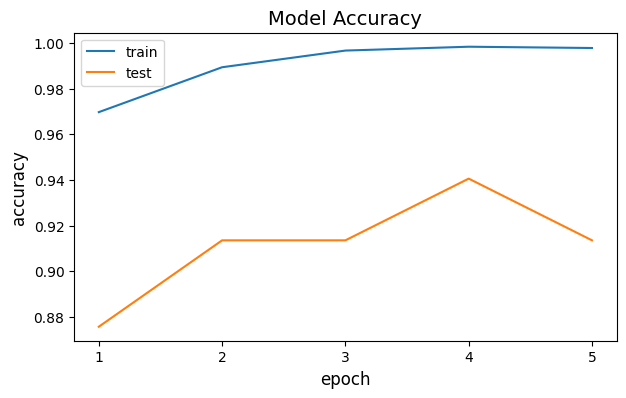

In [89]:
plt.figure(figsize=(7,4))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 14)
plt.ylabel('accuracy', fontsize = 12)
plt.xlabel('epoch', fontsize = 12)
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/my_model.h5')

## Analyze Review data

In [87]:
reviews_test = tokenizer(
    text = cleaned_reviews.tolist(),
    add_special_tokens=True,
    max_length= MAX_LEN,
    truncation=True,
    padding=True,
    return_tensors="tf",
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [88]:
# Predict the classes of the review dataset
preds = model.predict({"input_ids": reviews_test["input_ids"], "attention_mask": reviews_test["attention_mask"]})

# Convert predicted probabilities to binary class predictions
class_preds = np.where(preds > 0.5, 1, 0)

# Print the shapes of the predicted probabilities and class predictions
print(preds.shape, class_preds.shape)

174/174 [==============================] - 1206s 7s/step
(5566, 1) (5566, 1)


In [90]:
# Assign the predicted probabilities to a new column in the DataFrame
df['Sentiment'] = preds

# Display the first few rows of the DataFrame
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,0.998720
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,0.999164
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,0.999086
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,0.998818
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,0.999215


## Review with Positive Sentiment but less than 3 stars

In [91]:
pos_sentiment_less_3_star = df.query('Sentiment > 0.5 and Star < 3')
pos_sentiment_less_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
1103,ChIJT4C2kUZZei4RDc-3-pd3dsY,Don gO Coffee,Sophia 09,pisang gorengnya dikit pol kek 2 rb an\ntempat...,1,0.997152
2725,ChIJo9VseHxZei4RmLNuHMdOgPw,Mato Kopi 3,zamimotret,lagi asyik ngopi sering kaget dengan mas-mas y...,1,0.607000
2894,ChIJAd_fLEOzey4REvhX95u2-sc,Mrikiniki Angkringan And Gallery,Ragil Utami,Kak...tempatnya kurang bersih aja...disapu ata...,1,0.999089
2995,ChIJ6TZkt4EBey4RTSF7kRQtZww,Nawang Wulan Karaoke & Salon,Arini Arini,Saya ke Nawang Wulan refresing ngolor kabel al...,1,0.998911
3239,ChIJq8zJLyhfei4RBsyL7HhtMEA,Osea Resto and Bar Jogja,Arnovyan Pratikna,1 bintang untuk pelayanan yang luar biasa mewa...,2,0.998597


In [92]:
pos_sentiment_less_3_star.shape

(17, 6)

In [93]:
pos_sentiment_less_3_star['Review'].tolist()

['pisang gorengnya dikit pol kek 2 rb an\ntempat e mayan si sepi cocok buat intropet',
 'lagi asyik ngopi sering kaget dengan mas-mas yang SUKA NENDANG BOTOL AQUA...',
 'Kak...tempatnya kurang bersih aja...disapu atau apalah biar tambah nyaman klo buat ngopi...buat yg lainn..udah ok lah..apalgi pelayanan ramah❤👍',
 'Saya ke Nawang Wulan refresing ngolor kabel alias nyanyi ternyata room nya luas bersih sound sistem nya suaranya mantab mic nya mantab hbs Karaoke aku ke Salon nya Nawang Wulan potong rambut n facial creambath heemmm pijetnya uenak ora rugib',
 '1 bintang untuk pelayanan yang luar biasa mewah,\n1 bintang untuk view yang sangat fantastis aestetic banget tropic banget\n-3 star untuk spagetinya\nSpageti untuk seharga 75k kurang worth it, di sarangsari 38k lebih enak apalagi di seacoff madiun 25k lebih enak lagi. Untuk perbandingan 3 tempat itu spagetti disini kurang worth it, rata rata untuk menu westernya kurang pas cooking nya,',
 'Live musicnya pas akustik bagus banget..kar

**Some reviews reveal that many customers are dissatisfied with the service, taste of the food, or the price of the restaurant. However, there are also quite a few reviews that highlight the advantages of the restaurant.**

## Review with Positive Sentiment and 3 stars

In [94]:
pos_sentiment_3_star = df.query('Sentiment > 0.5 and Star == 3')
pos_sentiment_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
12,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Riza Pahlevi,Tempatnya cukup asyik buat duduk2 santai menik...,3,0.998020
47,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,ishaan,perorang dikenakan biaya 49ribu cuma dpt minum...,3,0.901771
155,ChIJc_LsfTBYei4R2ZbyfvHGvYw,Angkringan Kopi Joss Tugu Mbak lina,Rahajeng Marlitasari Putri,Lokasi yang pas dan view yang kita dapetin itu...,3,0.999113
160,ChIJc_LsfTBYei4R2ZbyfvHGvYw,Angkringan Kopi Joss Tugu Mbak lina,kaktus hijau,Tempat enak langsung view tugu jogja kalo male...,3,0.999119
180,ChIJk5mlx3Dkei4R6qbkrzjBp5w,Angkringan Kopi Joss,Rahajeng Marlitasari Putri,Lokasi yang pas dan view yang kita dapetin itu...,3,0.999113


In [95]:
pos_sentiment_3_star.shape

(151, 6)

In [96]:
pos_sentiment_3_star.Review.tolist()

['Tempatnya cukup asyik buat duduk2 santai menikmati Pantai Parangtritis, sayang harganya cukup mahal, ya walaupun harga disini emang rata2 segitu. Dan ini foto diambil di jembatan depan cafe ini.',
 'perorang dikenakan biaya 49ribu cuma dpt minum dan 1 roti, minuman bs di pilih teh/ kopi udah itu doang.... ruangan ac nya biasa aja gak dingin... colokan banyak bgt bisa colok hp/ laptop dimanapun..',
 'Lokasi yang pas dan view yang kita dapetin itu yang mahal. Disana tersaji suasana Jogja yang selalu dirindukan para wisatawan. Asik untuk nongkrong dan berbagai pilihan cemilan yang bisa dipilih dan yang paling hitss kopi Joss nya (kopi arang)',
 'Tempat enak langsung view tugu jogja kalo malem keren, makanan enak2 banyak pilihan sate2nya.',
 'Lokasi yang pas dan view yang kita dapetin itu yang mahal. Disana tersaji suasana Jogja yang selalu dirindukan para wisatawan. Asik untuk nongkrong dan berbagai pilihan cemilan yang bisa dipilih dan yang paling hitss kopi Joss nya (kopi arang)',
 'T

**Many customers express both their satisfaction and dissatisfaction with various aspects of the restaurant. For example, some customers may be satisfied with the taste of the food, but dissatisfied with the facilities or atmosphere of the restaurant. Conversely, there are customers who are satisfied with both the taste and service, but still express dissatisfaction with the price.**

## Review with Positive Sentiment with more than 3 stars

In [97]:
pos_sentiment_more_3_star = df.query('Sentiment > 0.5 and Star > 3')
pos_sentiment_more_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,0.998720
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,0.999164
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,0.999086
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,0.998818
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,0.999215


In [98]:
pos_sentiment_more_3_star.shape

(4239, 6)

In [99]:
pos_sentiment_more_3_star.Review.tolist()[500:540]

['Tempatnya strategis, rasanya pas, mantab',
 'rasa luar biasa dengan harga terjangkau..',
 'Mantulll endulita',
 'Segar dan murah',
 'Kesini beli mie jawa nyemek, beeehh gurih sekali, enak. Suasananya juga enak.',
 'Untuk agan-agan yang suka suasana santai di tengah kota, ini tempat asyik buat nikmati malam santai ditemani kopi yang asyik dan makanan nya itu lho Bakmi Jawa mantap...\nTempatnya luas dan nyaman...\nSo... Tunggu apa lagi??? Langsung aja ke TKP... 😀😀😀',
 'Saya suka ke Bradip karena buka sampai larut, danang lokasi yang masuk tidak terlalu terlihat dari jalan raya.\nCocok untuk meeting kecil ataupun mengobrol dengan teman, karena tidak bising suara kendaraan bermotor.\nMenu yang ditawarkan juga enak, seperti olahan bakmie Jawa dan nasi goreng, ada juga minuman teh poci yang disajikan dengan teko gerabah. Untuk harga affordable dan sesuai dengan rasa menunya.',
 'bisa ngobrol sambil ngopi dan main catur, harga menu sangat bersahabat',
 'Bakmi jawanya mantul bgt dan kopinya 

**The customers tend to express their satisfaction more frequently than the aspects they are dissatisfied with.**

## Review with negative Sentiment with more than 3 stars

In [100]:
neg_sentiment_more_3_star = df.query('Sentiment < 0.5 and Star > 3')
neg_sentiment_more_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,0.003071
25,ChIJCfxrxdPjei4R5O1EBSra9kc,Aguswijayatech,agus wijaya16,Oke,5,0.001387
57,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,Hello Reina,Sambil nunggu check in hotel karena nyampe sta...,4,0.009381
61,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,Mbah Dargombez,"ruang tunggu cukup luas dan bersih, banyak ter...",4,0.050230
71,ChIJAUC43qpLei4RKDScIdkWTrQ,Angkringan Argomidang,avin yanuanto,Es tehnya muanteb,5,0.368903


In [101]:
neg_sentiment_more_3_star.shape

(667, 6)

In [102]:
neg_sentiment_more_3_star.Review.tolist()

['Melukiskan suasana hati yang sulit dijelaskan',
 'Oke',
 'Sambil nunggu check in hotel karena nyampe stasiun jam 3.40 an pagi.\nTempat lumayan untuk beristirahat, dapat harga 58 ribu perorang. Untuk makanan tidak fresh, rasanya seperti makanan kemaren. Mungkin karena kurangnya tamu dan efek dipanasin terus menerus. All you can eat berupq bubur ayan, ayam kecap, sayur, buah semangka, cemilan, kue, roti panggang, aneka minuman panas dan orange juice.\nBtw disana menyediakan toilet, wifi, mushola. Toilet tidak untuk mandi!',
 'ruang tunggu cukup luas dan bersih, banyak tersedia kursi yang lumayan nyaman, tapi sayangnya temperatur udara kurang dingin.\nmakanan yang tersedia tidak begitu lengkap, tapi lumayan untuk mengganjal perut sambil nunggu kereta.\nnilai minus ada di toilet dan musholla. toilet biasa2 aja, tidak terlihat seperti layaknya toilet ditempat eksekutif. musholla juga terlalu sempit, meskipun dipisah antara laki2 dan perempuan, tapi masing2 cuma muat dua orang.\nbila kondi

**Many customers provide positive reviews for the restaurant. However, some customers solely offer critiques and express dissatisfaction. Additionally, there are also many customers who provide irrelevant reviews that do not offer any meaningful information about the restaurant.**

## Review with negative Sentiment with 3 stars

In [109]:
neg_sentiment_3_star = df.query('Sentiment < 0.5 and Star == 3')
neg_sentiment_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
22,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Nichan,Penjualnya ramah bngt. Harganya jujur sesuai m...,3,0.040668
142,ChIJU-mjYm7jei4RKHXQd_6o15I,Angkringan KlX,Tabita Putri,Orderan di gofood udah 4 kali order tidak diam...,3,0.001035
169,ChIJc_LsfTBYei4R2ZbyfvHGvYw,Angkringan Kopi Joss Tugu Mbak lina,Samudra Rio,"ditambah varian atau menu makanan , kurang...",3,0.008634
194,ChIJk5mlx3Dkei4R6qbkrzjBp5w,Angkringan Kopi Joss,Samudra Rio,"ditambah varian atau menu makanan , kurang...",3,0.008634
211,ChIJIb_J58uzey4RQrREa7APLVU,Angkringan Legendaris,Retno Murti,Baca referensi ayam madunya katanya paling ena...,3,0.000622


In [110]:
neg_sentiment_3_star.shape

(180, 6)

In [111]:
neg_sentiment_3_star.Review.tolist()

['Penjualnya ramah bngt. Harganya jujur sesuai menu. Cuma aksesnya itu, waduh bngtlah. Kl rasa mgkn selera tp sesuai harga saja.',
 'Orderan di gofood udah 4 kali order tidak diambil, tapi restonya buka :( kalau memang gamau ambil lebih baik di off-kan saja :(',
 'ditambah varian atau menu   makanan ,   kurang nya  tempat parkiran tidak rapi ,   cocok buat kumpul kumpul ..',
 'ditambah varian atau menu   makanan ,   kurang nya  tempat parkiran tidak rapi ,   cocok buat kumpul kumpul ..',
 'Baca referensi ayam madunya katanya paling enak, ternyata jauh dari definisi rasa enak. Sedikit kecewa apalagi nasinya agak dingin dan kaku.',
 'Agak lama yah padahal cuma Pesen pecel lele plus teh hangat, rasa sih ok, harga juga ok',
 'Sayur lodeh point',
 'Lokasi strategis di depan kopma UNY. Harganya juga standar, mulai dari 8000 udah dapet ayam, nasi, sama es teh. Sayangnya bentuk ayam (krispi dan geprek) di sini kecil banget, jadi kayak nggak makan apa-apa saking kecilnya, nggak seimbang sama na

**The customers tend to express their dissatisfaction more frequently compared to the aspects they are satisfied with.**

## Review with negative Sentiment less than 3 stars

In [106]:
neg_sentiment_less_3_star = df.query('Sentiment < 0.5 and Star < 3')
neg_sentiment_less_3_star.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
51,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,Kaharudin Aldian Saputra,"Sangat mengecewakan, memesan tiket Argo Lawu L...",1,0.000688
54,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,d Seprio,"Minumanya ga panas, jahe & teh nya dingin.\nKu...",2,0.001102
56,ChIJ6yf1WiRYei4RZNWve1zo5z4,Anggrek Executive Lounge Stasiun Tugu Yogyakarta,Panji Purnomo,"Agak payah yah, karena after servicenya parah ...",2,0.000695
73,ChIJ25JsWI_jei4Rpmn5VDDs_LU,Angkringan Bandara YIA,myunanda suken,"Harga tidak wajar, esteh + nasi kucing 2 + gor...",1,0.000640
139,ChIJxUnNYSVYei4RWxF9CIWisck,Angkringan Jaman Edan,maghfira diyaana,"Yaampun live music nya super kenceng suaranya,...",1,0.000770


In [107]:
neg_sentiment_less_3_star.shape

(312, 6)

In [108]:
neg_sentiment_less_3_star.Review.tolist()[100:115]

['Pas mau duduk di deretan meja paling utara, korsi plastinya kuwotorrrr buanget, setahuku emang untuk beresin bungkus makanan, minuman dan nampan setelah kita makan itu udah self service tapi ini kursi apa iya nggak di bersihin sama pegawainya kotor bgt sumpah. Dan masak ya di ruangan ber AC gitu ada lalet ijo terbang satu gede bgttttt sumpah nggak bohong nyesel waktu itu nggak saya foto pas laletnya hinggap di meja saja, cuman heran aja gedungnya luas bagus gitu tapi dalemnya OMG... Dr sekian banyak cabang yg pernah saya datengin cabang ini bikin saya merinding jorok bgt.  Tolong di kelola lg dengan baik supaya tidak ada yg zonk seperti saya',
 'Pelayanan jelek. Nunggu lebih dari 20 menit sedangkan ayam di display masih ada, bilangnya diantar. Setelah 20 menit tidak datang, dan ketika ditanya baru diantar.',
 'pelayannya tuh ky ngantuk jd ky ngajakin berantem ngomong sm pembelinya untung spv baik jd dicover... tlg kalo mau kerja jgn begadang mba jd emosi bawaanya ya',
 'bbrp kali kem

**The customers express their dissatisfaction with the restaurant or establishment in a clear manner.**

# Evaluating Model

* True Positive : Review with Positive Sentiment with 3 stars or more
* True Negative : Review with Negative Sentiment with 2 stars or less
* False Postive : Review with Positive Sentiment with 2 stars or less
* False Negative : Review with Negative Sentiment with 4 stars or more

In [112]:
TP = df.query('Sentiment > 0.5 and Star >= 3').shape[0]
TN = df.query('Sentiment < 0.5 and Star < 3').shape[0]
FP = df.query('Sentiment > 0.5 and Star < 3').shape[0]
FN = df.query('Sentiment < 0.5 and Star >= 3').shape[0]

In [113]:
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
Accuracy = (TP + TN) / (TP+TN+FP+FN)
F1_measure = (2*Recall*Precision) / (Recall + Precision)

In [114]:
print('The Model Evaluation Metrics : ')
print(f"The recall is {Recall:.2f}")
print(f"The precision is {Precision:.2f}")
print(f"The accuracy is {Accuracy:.2f}")
print(f"The F1 measure is {F1_measure:.2f}")

The Model Evaluation Metrics : 
The recall is 0.84
The precision is 1.00
The accuracy is 0.84
The F1 measure is 0.91


# Merged the Cleaned Reviews with positive sentiment and more than 3 stars rating

In [115]:
df['cleaned_reviews'] = cleaned_reviews.tolist()

In [116]:
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment,cleaned_reviews
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,0.998720,akhir bisa menulis review yang memuaskan lagi ...
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,0.999164,cafe deh paris terletak di timur pantai parang...
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,0.999086,masakan enak tetapi kecil sesuai dengan harga ...
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,0.998818,owner baik banget menginap di sini pas ramadan...
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,0.999215,tempat bagus banget makanan enak dan cocok bua...


In [117]:
# Select specific columns from the original DataFrame
df_selected = df[['Place_ID', 'Place_Name', 'cleaned_reviews', 'Star', 'Sentiment']]

# Display the first few rows of the selected DataFrame
df_selected.head()

,Place_ID,Place_Name,cleaned_reviews,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",akhir bisa menulis review yang memuaskan lagi ...,5,0.998720
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",cafe deh paris terletak di timur pantai parang...,5,0.999164
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",masakan enak tetapi kecil sesuai dengan harga ...,4,0.999086
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",owner baik banget menginap di sini pas ramadan...,5,0.998818
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",tempat bagus banget makanan enak dan cocok bua...,5,0.999215


In [118]:
# Filter rows with positive sentiment and 3 stars or more and select specific columns
df_selected = df_selected.query('Star > 3 and Sentiment > 0.5')[['Place_ID', 'Place_Name', 'cleaned_reviews']]

# Display the first few rows of the updated DataFrame
df_selected.head()

,Place_ID,Place_Name,cleaned_reviews
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",akhir bisa menulis review yang memuaskan lagi ...
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",cafe deh paris terletak di timur pantai parang...
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",masakan enak tetapi kecil sesuai dengan harga ...
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",owner baik banget menginap di sini pas ramadan...
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",tempat bagus banget makanan enak dan cocok bua...


In [119]:
# Calculates the number of unique values in the 'Place_ID' column of the df_selected
len(df_selected.Place_ID.unique())

351

In [120]:
# Concatenated reviews for each restaurant
df_fix = df_selected.groupby(['Place_ID', 'Place_Name']).agg({'cleaned_reviews': ' '.join}).reset_index()

In [121]:
# Check spesific review
df_fix.query('Place_ID == "ChIJU39AYwyqey4RXFIG9IudN8M"').cleaned_reviews.tolist()

['akhir bisa menulis review yang memuaskan lagi enak banget ikan bakarnyaa makanan semua oke sentuhan bumbu lain dari pada yang lain ibu bapak lupa belum kenalan super ramah couple goals bisa haha hihi sampai menua bersama sehat selalu bapak ibu janji deh akan balik lagi suka banget sama tempat dan masakan ibu bule saja makan di sini wisatawan lokal jangan mau kalah dongggjelajahi terus wisata indonesia terima kasih bonus tuna busempat galau antara kakap atau tuna akhir malah bisa merasakan keduanyaa cafe deh paris terletak di timur pantai parangtritis dan akses dengan jalan kaki dari parkiran terakhir makanan cukup banyak pilihan mulai dari seafood sayur dan minuman suasan nyaman dan santai dengan banyak pilihan tempat duduk ayunan tempat tidur gantung serta gazebo konsep nya cafe pantai yang asyik harga nya murah untuk di tempat wisata worth it masakan enak tetapi kecil sesuai dengan harga pisang goreng mantap sambel mantap owner baik banget menginap di sini pas ramadan pesan makanan

In [122]:
# Convert dataframe to csv
df_fix.to_csv('/content/drive/MyDrive/Capstone | Bangkit 2023/Sentiment Analysis/aggregated_reviews.csv')